# Instituto Infnet
# Projeto da Disciplina: Algoritmos Não-Supervisionados para clusterização [22E4_2]
## Aluno: Pedro Pinheiro Cabral
## Professor: Luiz Frias

In [76]:
# Importar bibliotecas
import pandas as pd
from pivottablejs import pivot_ui
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from platform import python_version

pd.set_option('display.max_rows', 500)


In [77]:
python_version()

'3.9.7'

# Escolha da base de dados

In [2]:
# importar dados
df = pd.read_csv("../data/raw/Country-data.csv")

In [3]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
# Quantos países existem no dataset?
len(df.country.unique())

167

In [7]:
# Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados.
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [23]:
# O que deve ser feito com os dados antes da etapa de clusterização? Realize o pré-processamento adequado dos dados.
scaler = StandardScaler() ## <- normalização!
scaler = scaler.fit(df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']])

df_scaled = scaler.transform(df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']])

df_scaled = df[['country']].join(pd.DataFrame(df_scaled, columns=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']))

df_scaled

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,Yemen,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


# Clusterização

In [27]:
# 1 - a. K-Médias
kmeans = KMeans(n_clusters=3, random_state=42)
k_fit = kmeans.fit(df_scaled[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']])

clusters = k_fit.labels_
cluster_df = df_scaled.copy()
cluster_df['cluster'] = clusters

cluster_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,2
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,2
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,2
163,Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,2
164,Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,2
165,Yemen,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,1


In [28]:
cluster_df.cluster.value_counts()

2    84
1    47
0    36
Name: cluster, dtype: int64

In [37]:
# Qual a distribuição das dimensões em cada grupo
cluster_df.groupby('cluster').mean().T

# claramente, pela tabela abaixo, cluster 0 é dos países mais desenvolvidos, 2 são países intermediários e o 1 são países pobres

cluster,0,1,2
child_mort,-0.827449,1.360218,-0.406453
exports,0.645080,-0.437533,-0.031653
health,0.727411,-0.155984,-0.224471
imports,0.190639,-0.189204,0.024162
income,1.484243,-0.686894,-0.251770
inflation,-0.484921,0.402111,-0.017167
life_expec,1.079579,-1.282180,0.254734
total_fer,-0.791877,1.364944,-0.424343
gdpp,1.615995,-0.604242,-0.354481


In [42]:
# O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique

# Encontrar os países mais próximos dos centroides por cluster
closest, _ = pairwise_distances_argmin_min(k_fit.cluster_centers_, cluster_df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']])
closest

array([68, 63, 76], dtype=int64)

In [44]:
# Cluster 0 (desenvolvidos)
cluster_df.iloc[68]

country        Iceland
child_mort   -0.887138
exports       0.449729
health        0.943661
imports      -0.148743
income        1.126692
inflation     -0.21936
life_expec    1.290735
total_fer    -0.495567
gdpp          1.583465
cluster              0
Name: 68, dtype: object

In [45]:
# Cluster 1 (pobres)
cluster_df.iloc[63]

country         Guinea
child_mort    1.759101
exports      -0.395501
health       -0.688559
imports      -0.152886
income       -0.830097
inflation     0.789274
life_expec   -1.416081
total_fer     1.584856
gdpp         -0.673981
cluster              1
Name: 63, dtype: object

In [46]:
# Cluster 2 (intermediários)
cluster_df.iloc[76]

country        Jamaica
child_mort   -0.501643
exports      -0.358911
health       -0.732377
imports       0.112267
income       -0.475784
inflation     0.192444
life_expec    0.467412
total_fer    -0.515444
gdpp         -0.453336
cluster              2
Name: 76, dtype: object

In [47]:
# Esses representam melhor o agrupamento pois são os mais próximos aos centróides, que, nesse caso, são os "países fictícios"
# que representam exatamente o cluster. 

Text(0.5, 1.0, 'Dendrogram')

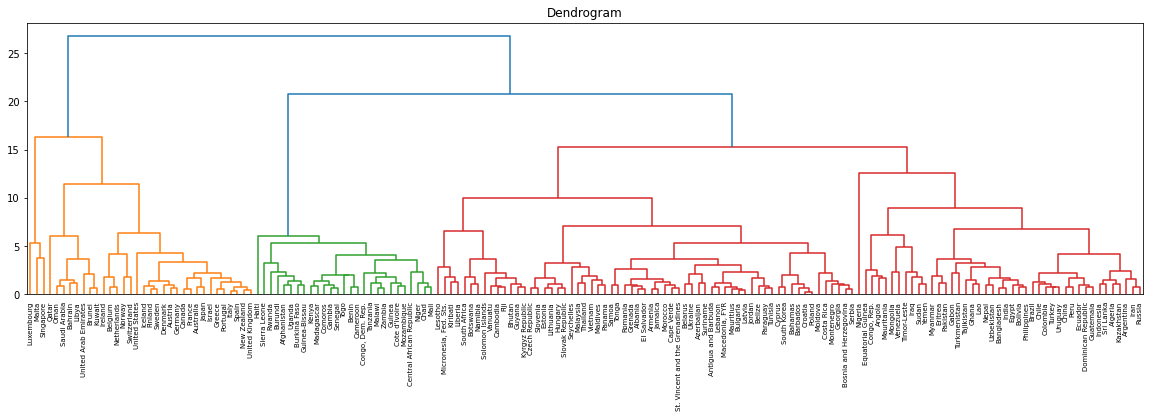

In [67]:
# Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados

plt.figure(figsize=(20, 5))
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(df_scaled.drop('country', axis=1), method='ward'), labels=df_scaled.country.tolist(), leaf_font_size=7)
plt.title('Dendrogram')

Text(0.5, 1.0, 'Dendrogram')

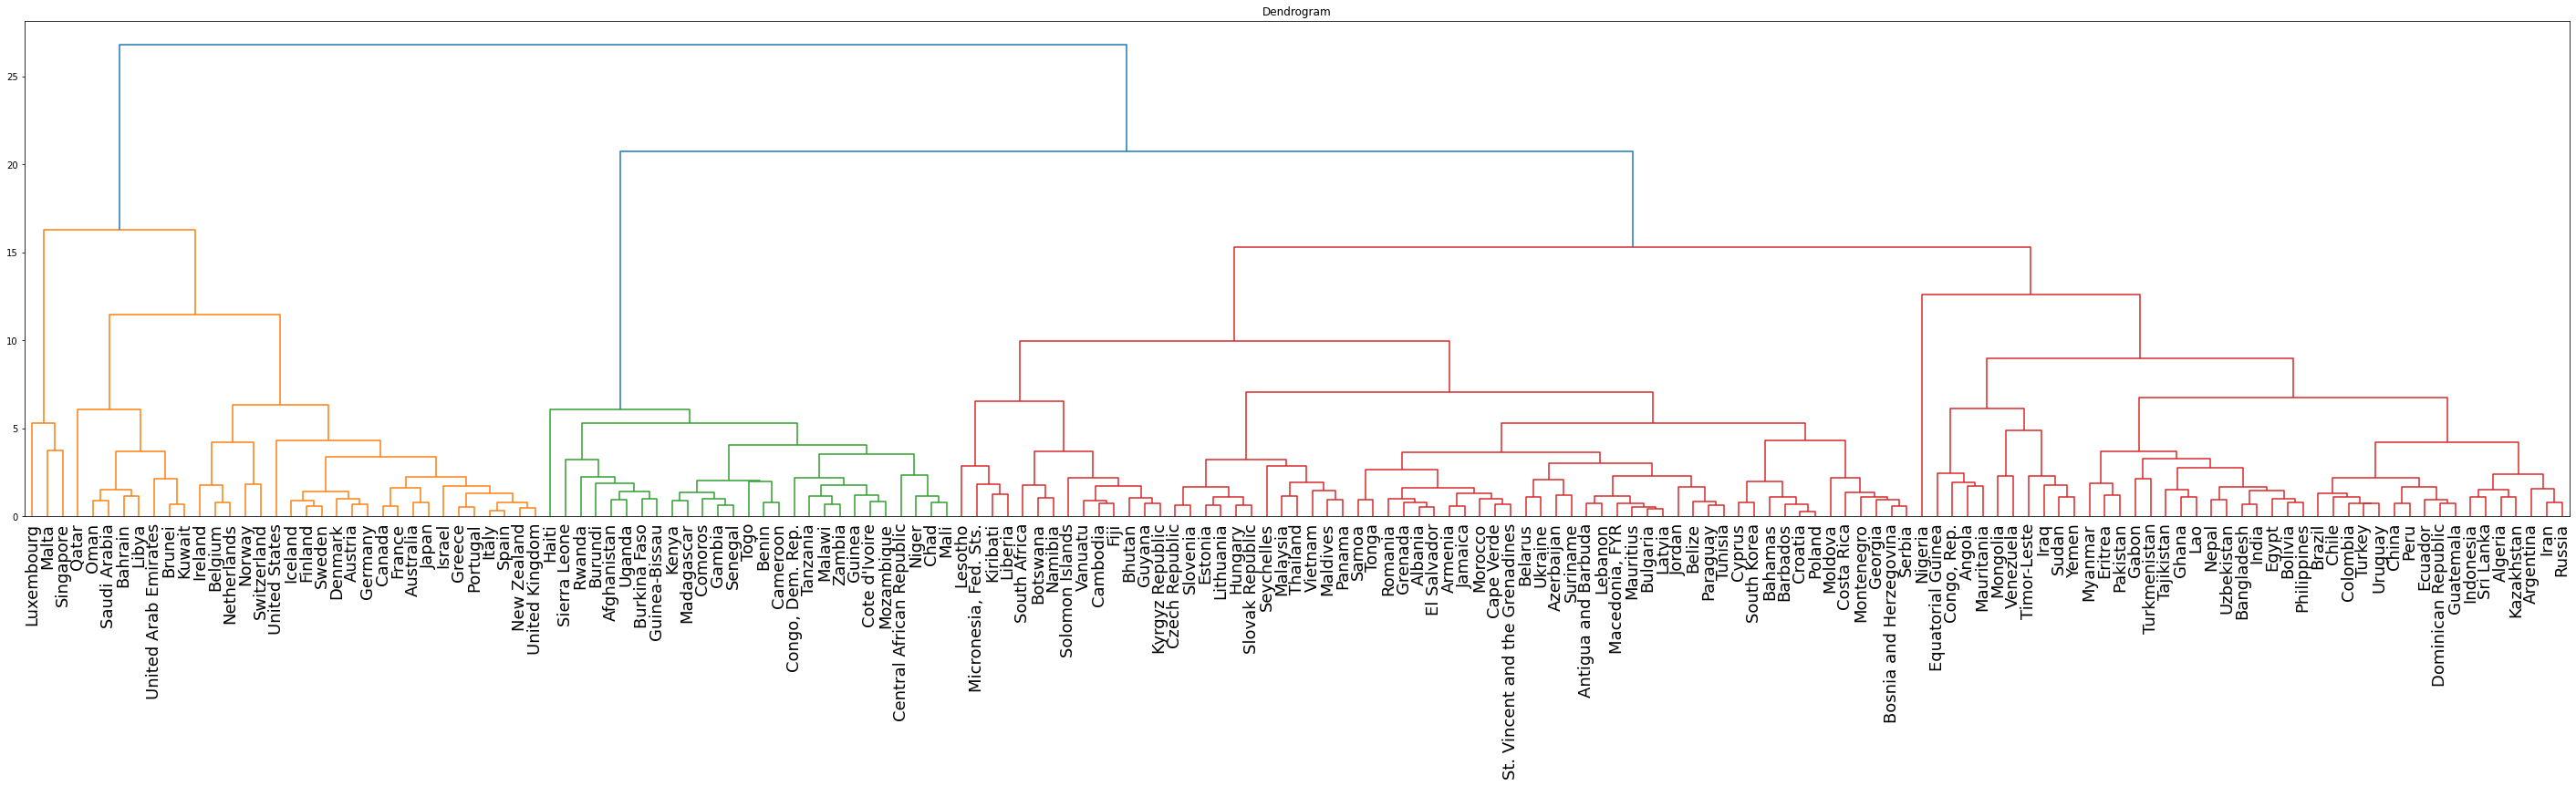

In [68]:
# Zoom

plt.figure(figsize=(50, 10))
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(df_scaled.drop('country', axis=1), method='ward'), labels=df_scaled.country.tolist(), leaf_font_size=18)
plt.title('Dendrogram')

In [71]:
# É visível no dendograma que os países desenvolvidos ficaram em laranja, os pobres em verde e os intermediários em vermelho.
# No "olhômetro" mesmo é possível notar inclusive que a quantidade de países por cor no dendograma é muito similar que o 
# encontrado no k-means. Isso que o dendograma é construído de maneira bem diferente, e determinística, enquanto o k-means 
# depende da inicialização. Também, no dendograma, conseguimos ver similaridades entre elementos individuais, por exemplo:
# vemos que o Brasil se parece mais com Chile, Colômbia, Turquia e Uruguai do que todos os outros países. No k-means não dá
# a priori para fazer uma análise intra-cluster.

# Escolha de algoritmos

In [72]:
#Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.


# Etapa 1: Input do número K para decidir o número de clusters, o número de iterações e da tolerância para uma parada precoce;

# Etapa 2: Seleciona-se K pontos aleatórios ou centróides;

# Etapa 3: Atribui-se a cada ponto ao centróide mais próximo, que formam os K clusters predefinidos;

# Etapa 4: Calcula-se a média de todos os pontos de cada cluster, e reposicionam-se os centróides nesses locais;

# Etapa 5: Repete-se a terceira etapa: reatribui-se cada ponto ao novo centróide mais próximo de cada, redefinindo o cluster;

# Etapa 6: Se a tolerância ou o número de iterações tiver sido atingido, siga em frente. Caso contrário volte à etapa 4;
 
# Etapa 7: O modelo está pronto.


In [73]:
# Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo
# ao seu baricentro em todas as iterações do algoritmo.


# Etapa 1: Input do número K para decidir o número de clusters, o número de iterações e da tolerância para uma parada precoce;

# Etapa 2: Seleciona-se K pontos aleatórios ou centróides;

# Etapa 3: Atribui-se a cada ponto ao centróide mais próximo, que formam os K clusters predefinidos;

# Etapa 4: Calcula-se a média de todos os pontos de cada cluster, encontram-se os pontos mais próximos dessas médias
# e reposicionam-se os centróides nesses locais;

# Etapa 5: Repete-se a terceira etapa: reatribui-se cada ponto ao novo centróide mais próximo de cada, redefinindo o cluster;

# Etapa 6: Se a tolerância ou o número de iterações tiver sido atingido, siga em frente. Caso contrário volte à etapa 4;
 
# Etapa 7: O modelo está pronto.



In [74]:
#  O algoritmo de K-médias é sensível a outliers nos dados. Explique.

# Na etapa 4, calcula-se o novo centróide pela média dos valores dentro de um cluster, cluster esse que até então é composto
# pelos pontos mais próximos ao centróide calculado na rodada anterior, portanto, todos os pontos obrigatoriamente estão em
# algum cluster. Um ponto outlier portanto acaba também entrando no cálculo da média, e fará com que a média se distancie
# muito da mediana do cluster. Sendo assim, em uma amostra com 1 outlier e k = 2, o que deverá acontecer é que um cluster
# será exclusivo do outlier e os demais pontos ficarão todos em um mesmo outro cluster.

In [ ]:
# Por que o algoritmo de DBScan é mais robusto à presença de outliers?

# O motivo é que o DB Scan apenas atua apenas na vizinhança dos chamados Core points, que são pontos que possuem um número 
# mínimo predefinido de vizinhos. Tendo em vista que outliers costumam estar isolados, não serão Core points e também não serão
# vizinhos a nenhum outro Core point, e assim portanto sendo rotulado como ruído, fora de qualquer um dos clusters.
# Ao contrário do K-means, o DBScan aceita pontos fora de clusters.